## Import Required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Reading of the file of given dataset

In [2]:
data = pd.read_csv('WineQT.csv')

## Top 5 records in table

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## classes of target value = Quaity

In [4]:
set(data.quality) # Quaity of data 

{3, 4, 5, 6, 7, 8}

## Description of give dataset

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## To check the missing values

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Correlation Matrics among all inside the dataset

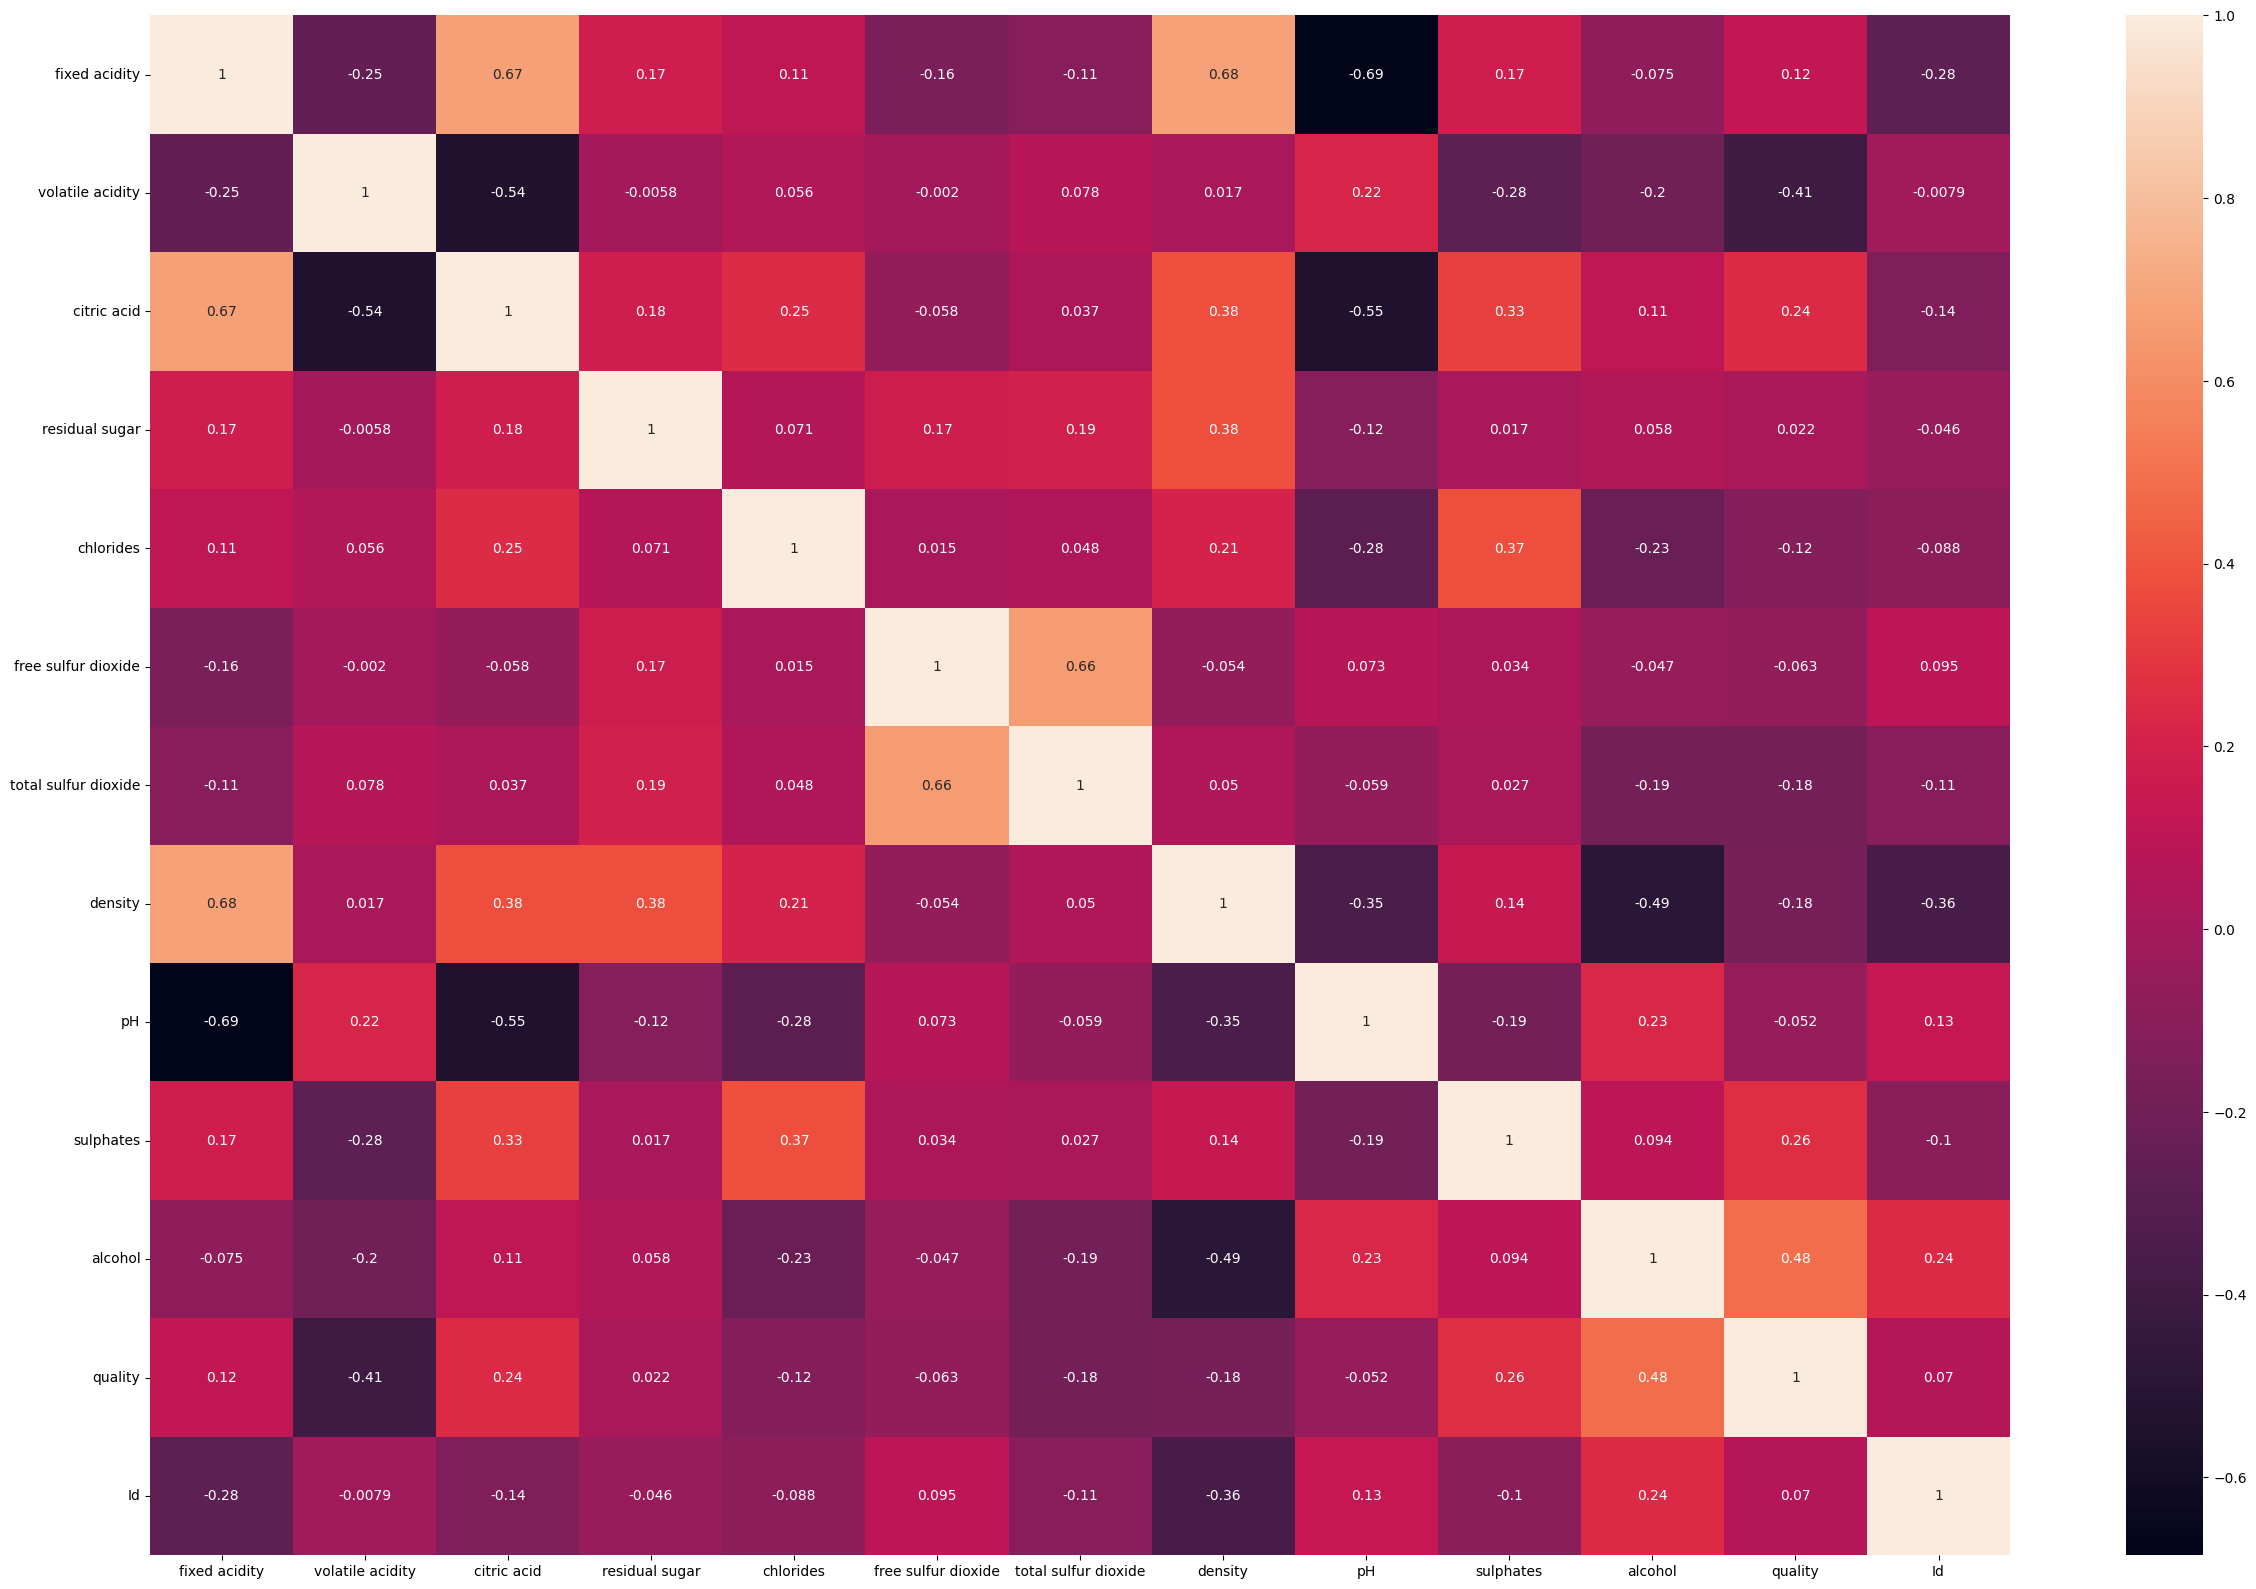

In [7]:
plt.figure(figsize=(30,20))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.savefig("Correlation Matrix.png")
plt.show()

## find the Outliers using z-score

In [8]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

### z> 3 (Theshold)--> outlier 

In [9]:
print(np.where(z>3))

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122]), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  4,  1,  4,  9

## Remove those records whose z>3 (outlier)

In [10]:
new_data = data[(z<3).all(axis=1)]

In [11]:
new_data.shape

(1041, 13)

In [12]:
data.shape

(1143, 13)

## Data splitting into features(X) and target column(y)

In [13]:
from sklearn.model_selection import train_test_split
## X is input feature 
X = new_data.drop(columns='quality')
## y is outcome
y = new_data['quality']

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [15]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Data Modeling using Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators=100) ## 100 Decision tree

In [18]:
rf_classificationModel.fit(X_train,y_train)

RandomForestClassifier()

## Prediction of data using Random Forest model

In [19]:
y_pred = rf_classificationModel.predict(X_test)

In [20]:
y_pred

array([5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5,
       7, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 5, 7, 5, 7, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6,
       7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6,
       7, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 7, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 6, 7, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5])

## Data Evaluation on metrics 

In [21]:
from sklearn import metrics
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6794258373205742


####  Accuracy Score : 66.50%

#### 1. Hyperparameter Tuning --> GraindSearchCV

[Text(0.6127857977303071, 0.9705882352941176, 'x[6] <= 62.5\ngini = 0.636\nsamples = 538\nvalue = [22, 356, 335, 112, 7]'),
 Text(0.3170268691588785, 0.9117647058823529, 'x[2] <= 0.295\ngini = 0.649\nsamples = 422\nvalue = [20, 229, 300, 107, 7]'),
 Text(0.46490633344459276, 0.9411764705882353, 'True  '),
 Text(0.15061748998664887, 0.8529411764705882, 'x[1] <= 0.555\ngini = 0.59\nsamples = 243\nvalue = [19, 175, 164, 19, 0]'),
 Text(0.04739652870493992, 0.7941176470588235, 'x[10] <= 9.55\ngini = 0.531\nsamples = 84\nvalue = [4, 43, 73, 4, 0]'),
 Text(0.0267022696929239, 0.7352941176470589, 'x[3] <= 2.35\ngini = 0.509\nsamples = 18\nvalue = [1, 15, 9, 0, 0]'),
 Text(0.021361815754339118, 0.6764705882352942, 'x[7] <= 0.997\ngini = 0.459\nsamples = 15\nvalue = [1.0, 15.0, 6.0, 0.0, 0.0]'),
 Text(0.010680907877169559, 0.6176470588235294, 'x[6] <= 20.5\ngini = 0.255\nsamples = 10\nvalue = [1, 12, 1, 0, 0]'),
 Text(0.0053404539385847796, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = 

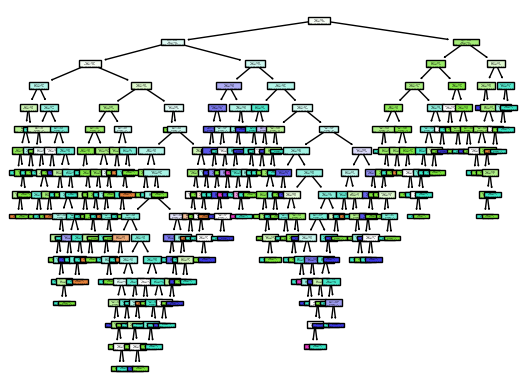

In [22]:
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0],filled=True)